In [7]:
import chaospy as cp
import a_comparison as acn
import calculation_plot as calp
import sampling_method as sm
import numpy as np
import convergence_rate_f as crf
import comparison_abs_maes as cam
%matplotlib inline

In [8]:
%%time
k = [10, 19]
#k = dimension
N = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
#N = sample of size
leng = len(N)
R = 50
#replicated R times
NN = int(leng*R)
#define variations of the test function

Wall time: 0 ns


In [9]:
%%time
kk_1 = k[0]
#choose dimension
a1 = sm.create_coefficient_a(kk_1, "A1-2")
#set up test case

Wall time: 0 ns


In [10]:
%%time
#chaospy Sobol
rule1 = "S"
#chaospy Latin Hypercube
rule2 = "L"
#Random
rule3 = "R"

Wall time: 0 ns


In [11]:
%%time
er_si_N_1, er_sti_N_1 = calp.n_calculate(kk_1, N, a1, R, rule1)
#calculate estimated S_i and S_ti for rule1

Wall time: 17min 10s


In [12]:
%%time
er_si_N_2, er_sti_N_2 = calp.n_calculate(kk_1, N, a1, R, rule2)
#calculate estimated S_i and S_ti for rule2

Wall time: 11min 49s


In [13]:
%%time
er_si_N_3, er_sti_N_3 = calp.n_calculate(kk_1, N, a1, R, rule3)
#calculate estimated S_i and S_ti for rule3

Wall time: 11min 27s


In [14]:
%%time
er_si_max_1 = er_si_N_1[(NN-R):NN, :]
er_sti_max_1 = er_sti_N_1[(NN-R):NN, :]
#get the S_i and S_ti of rule1 for max N 

Wall time: 0 ns


In [15]:
%%time
er_si_max_2 = er_si_N_2[(NN-R):NN, :]
er_sti_max_2 = er_sti_N_2[(NN-R):NN, :]
#get the S_i and S_ti of rule2 for max N 

Wall time: 0 ns


In [16]:
%%time
er_si_max_3 = er_si_N_3[(NN-R):NN, :]
er_sti_max_3 = er_sti_N_3[(NN-R):NN, :]
#get the S_i and S_ti of rule3 for max N 

Wall time: 0 ns


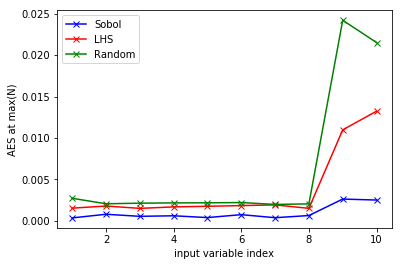

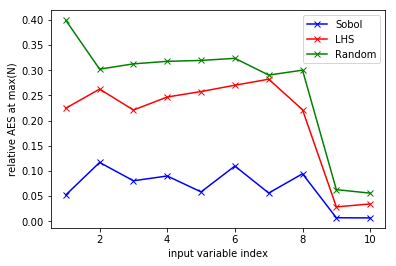

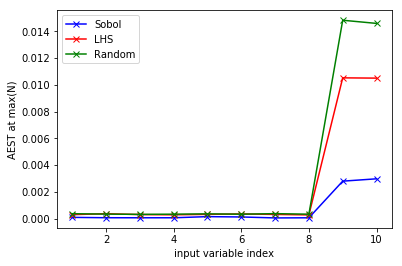

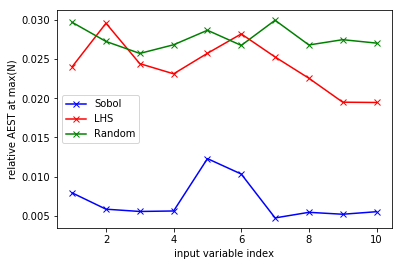

Wall time: 593 ms


In [17]:
%%time
calp.draw_aes_plot_nomorris(kk_1, a1, R, er_si_max_1, er_si_max_2
                   , er_si_max_3, er_sti_max_1
                   , er_sti_max_2, er_sti_max_3)
#draw i-wise errors AES and AEST at max N

In [18]:
%%time
aes_1_N, aest_1_N, rel_aes_1_N, rel_aest_1_N = calp.aes_aest_N(N, kk_1, R
                                                               , a1, er_si_N_1
                                                               , er_sti_N_1)
maes_1, maest_1 = calp.maes_maest_N(N, kk_1
                                    , aes_1_N, aest_1_N)
rel_maes_1, rel_maest_1 = calp.maes_maest_N(N, kk_1
                                            , rel_aes_1_N, rel_aest_1_N)
#calculate convergence MAES, MAEST, and relative error for rule1

Wall time: 21 ms


In [19]:
%%time
aes_2_N, aest_2_N, rel_aes_2_N, rel_aest_2_N = calp.aes_aest_N(N, kk_1, R
                                                               , a1, er_si_N_2
                                                               , er_sti_N_2)
maes_2, maest_2 = calp.maes_maest_N(N, kk_1
                                    , aes_2_N, aest_2_N)
rel_maes_2, rel_maest_2 = calp.maes_maest_N(N, kk_1
                                            , rel_aes_2_N, rel_aest_2_N)
#calculate convergence MAES, MAEST, and relative error for rule2

Wall time: 18 ms


In [20]:
%%time
aes_3_N, aest_3_N, rel_aes_3_N, rel_aest_3_N = calp.aes_aest_N(N, kk_1, R
                                                               , a1, er_si_N_3
                                                               , er_sti_N_3)
maes_3, maest_3 = calp.maes_maest_N(N, kk_1
                                    , aes_3_N, aest_3_N)
rel_maes_3, rel_maest_3 = calp.maes_maest_N(N, kk_1
                                            , rel_aes_3_N, rel_aest_3_N)
#calculate convergence MAES, MAEST, and relative error for rule3

Wall time: 19 ms


In [21]:
%%time
name_z_1 = ["Sobol MAES", "LHS MAES"
            , "Random MAES", "Sobol MAEST"
            , "LHS MAEST", "Random MAEST"
            , "Sobol rMAES", "LHS rMAES"
            , "Random rMAES", "Sobol rMAEST"
            , "LHS rMAEST", "Random rMAEST"]
z_1 = crf.convergence_rate(N, maes_1, name_z_1[0])
z_2 = crf.convergence_rate(N, maes_2, name_z_1[1])
z_3 = crf.convergence_rate(N, maes_3, name_z_1[2])
z_t_1 = crf.convergence_rate(N, maest_1, name_z_1[3])
z_t_2 = crf.convergence_rate(N, maest_2, name_z_1[4])
z_t_3 = crf.convergence_rate(N, maest_3, name_z_1[5])
z_r_1 = crf.convergence_rate(N, rel_maes_1, name_z_1[6])
z_r_2 = crf.convergence_rate(N, rel_maes_2, name_z_1[7])
z_r_3 = crf.convergence_rate(N, rel_maes_3, name_z_1[8])
z_r_t_1 = crf.convergence_rate(N, rel_maest_1, name_z_1[9])
z_r_t_2 = crf.convergence_rate(N, rel_maest_2, name_z_1[10])
z_r_t_3 = crf.convergence_rate(N, rel_maest_3, name_z_1[11])

Sobol MAES convergence rate =  0.840901532994
-------------------------------------
LHS MAES convergence rate =  0.620688228211
-------------------------------------
Random MAES convergence rate =  0.644472810933
-------------------------------------
Sobol MAEST convergence rate =  0.797260257626
-------------------------------------
LHS MAEST convergence rate =  0.612000552501
-------------------------------------
Random MAEST convergence rate =  0.634729577755
-------------------------------------
Sobol rMAES convergence rate =  0.776309213807
-------------------------------------
LHS rMAES convergence rate =  0.592286660621
-------------------------------------
Random rMAES convergence rate =  0.622425084305
-------------------------------------
Sobol rMAEST convergence rate =  0.722758827906
-------------------------------------
LHS rMAEST convergence rate =  0.578431971176
-------------------------------------
Random rMAEST convergence rate =  0.617445390376
----------------------

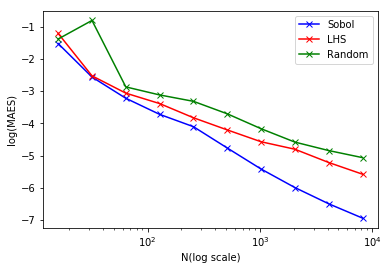

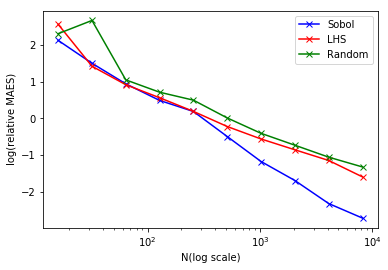

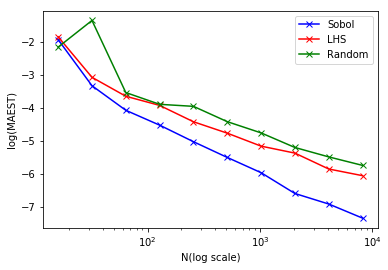

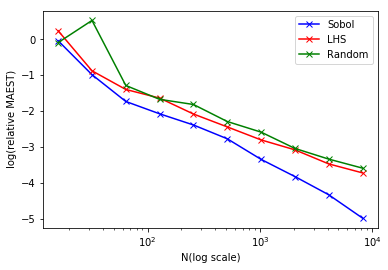

Wall time: 1.68 s


In [22]:
%%time
calp.draw_maes_plot_nomorris(N, maes_1, maes_2, maes_3
                    , maest_1, maest_2, maest_3
                    , rel_maes_1, rel_maes_2, rel_maes_3
                    , rel_maest_1, rel_maest_2, rel_maest_3)
#draw convergence log(MAES) and log(MAEST)

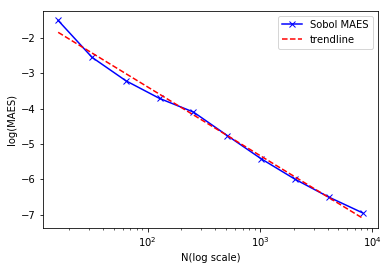

Wall time: 465 ms


In [23]:
%%time
#double check trend line
crf.check_trend_line(z_1, N, maes_1, name_z_1[0])

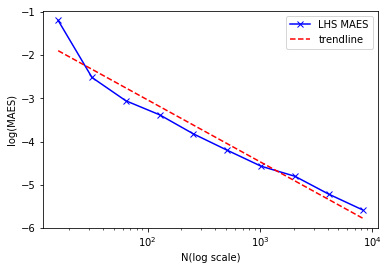

Wall time: 311 ms


In [24]:
%%time
crf.check_trend_line(z_2, N, maes_2, name_z_1[1])

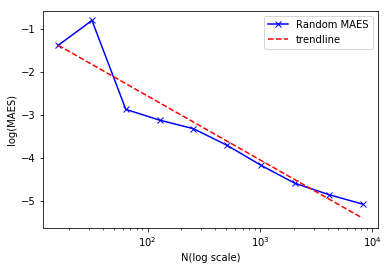

Wall time: 395 ms


In [25]:
%%time
crf.check_trend_line(z_3, N, maes_3, name_z_1[2])

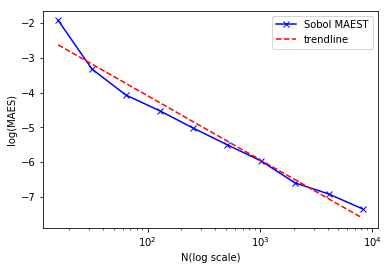

Wall time: 337 ms


In [26]:
%%time
crf.check_trend_line(z_t_1, N, maest_1, name_z_1[3])

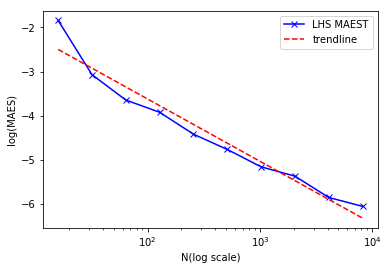

Wall time: 365 ms


In [27]:
%%time
crf.check_trend_line(z_t_2, N, maest_2, name_z_1[4])

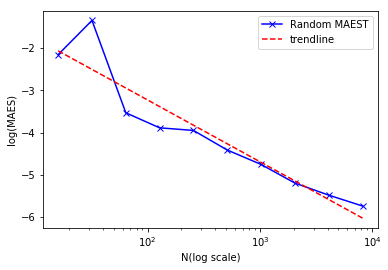

Wall time: 307 ms


In [28]:
%%time
crf.check_trend_line(z_t_3, N, maest_3, name_z_1[5])

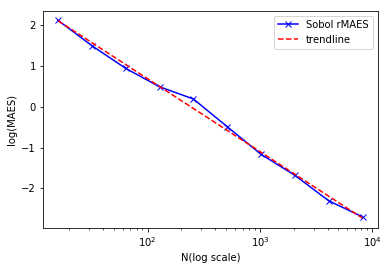

Wall time: 299 ms


In [29]:
%%time
crf.check_trend_line(z_r_1, N, rel_maes_1, name_z_1[6])

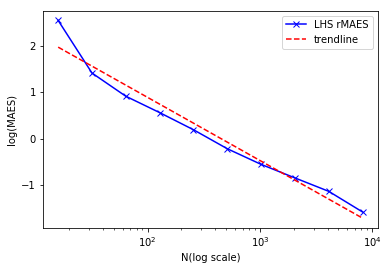

Wall time: 285 ms


In [30]:
%%time
crf.check_trend_line(z_r_2, N, rel_maes_2, name_z_1[7])

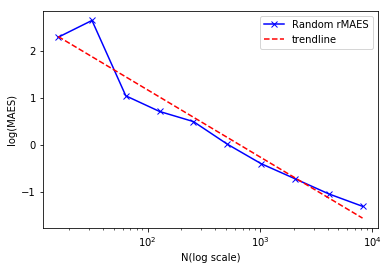

Wall time: 347 ms


In [31]:
%%time
crf.check_trend_line(z_r_3, N, rel_maes_3, name_z_1[8])

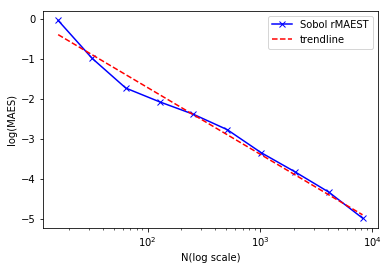

Wall time: 349 ms


In [32]:
%%time
crf.check_trend_line(z_r_t_1, N, rel_maest_1, name_z_1[9])

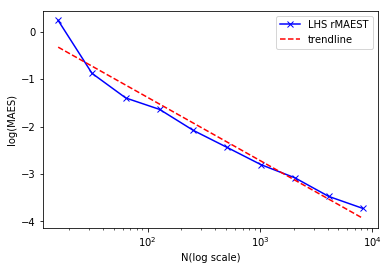

Wall time: 305 ms


In [33]:
%%time
crf.check_trend_line(z_r_t_2, N, rel_maest_2, name_z_1[10])

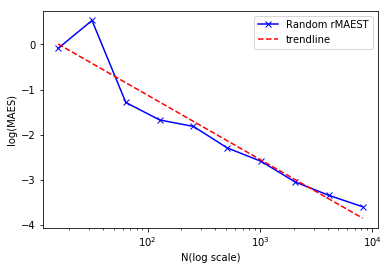

Wall time: 393 ms


In [34]:
%%time
crf.check_trend_line(z_r_t_3, N, rel_maest_3, name_z_1[11])

In [35]:
%%time
#start another k, repeat above steps
kk_2 = k[1]
#choose dimension
a2 = sm.create_coefficient_a(kk_2, "A1-2")
#set up test case

Wall time: 0 ns


In [36]:
%%time
er_si_N_1_2, er_sti_N_1_2 = calp.n_calculate(kk_2, N, a2, R, rule1)
#calculate estimated S_i and S_ti for rule1

Wall time: 1h 5min


In [37]:
%%time
er_si_N_2_2, er_sti_N_2_2 = calp.n_calculate(kk_2, N, a2, R, rule2)
#calculate estimated S_i and S_ti for rule2

Wall time: 38min 18s


In [38]:
%%time
er_si_N_3_2, er_sti_N_3_2 = calp.n_calculate(kk_2, N, a2, R, rule3)
#calculate estimated S_i and S_ti for rule3

Wall time: 30min 39s


In [39]:
%%time
er_si_max_1_2 = er_si_N_1_2[(NN-R):NN, :]
er_sti_max_1_2 = er_sti_N_1_2[(NN-R):NN, :]
#get the S_i and S_ti of rule1 for max N 

Wall time: 0 ns


In [40]:
%%time
er_si_max_2_2 = er_si_N_2_2[(NN-R):NN, :]
er_sti_max_2_2 = er_sti_N_2_2[(NN-R):NN, :]
#get the S_i and S_ti of rule2 for max N 

Wall time: 0 ns


In [41]:
%%time
er_si_max_3_2 = er_si_N_3_2[(NN-R):NN, :]
er_sti_max_3_2 = er_sti_N_3_2[(NN-R):NN, :]
#get the S_i and S_ti of rule3 for max N 

Wall time: 0 ns


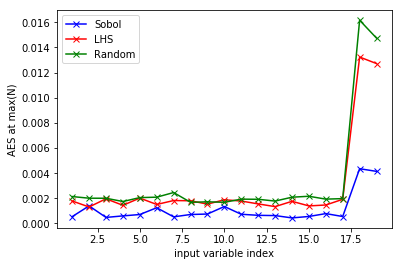

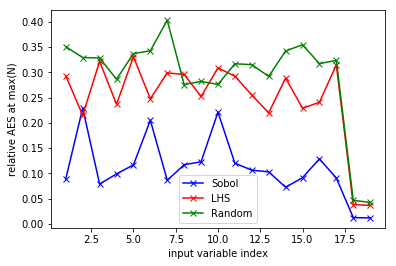

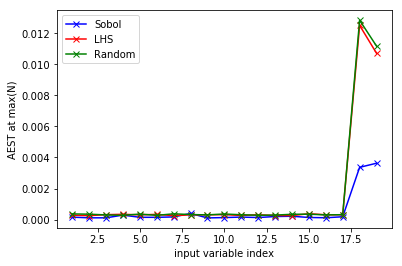

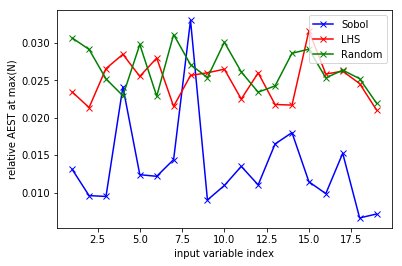

Wall time: 563 ms


In [42]:
%%time
calp.draw_aes_plot_nomorris(kk_2, a2, R, er_si_max_1_2, er_si_max_2_2
                   , er_si_max_3_2, er_sti_max_1_2
                   , er_sti_max_2_2, er_sti_max_3_2)
#draw i-wise errors AES and AEST at max N

In [43]:
%%time
aes_1_N_2, aest_1_N_2, rel_aes_1_N_2, rel_aest_1_N_2 = calp.aes_aest_N(N, kk_2, R
                                                               , a2, er_si_N_1_2
                                                               , er_sti_N_1_2)
maes_1_2, maest_1_2 = calp.maes_maest_N(N, kk_2
                                    , aes_1_N_2, aest_1_N_2)
rel_maes_1_2, rel_maest_1_2 = calp.maes_maest_N(N, kk_2
                                            , rel_aes_1_N_2, rel_aest_1_N_2)
#calculate convergence MAES, MAEST, and relative error for rule1

Wall time: 34 ms


In [44]:
%%time
aes_2_N_2, aest_2_N_2, rel_aes_2_N_2, rel_aest_2_N_2 = calp.aes_aest_N(N, kk_2, R
                                                               , a2, er_si_N_2_2
                                                               , er_sti_N_2_2)
maes_2_2, maest_2_2 = calp.maes_maest_N(N, kk_2
                                    , aes_2_N_2, aest_2_N_2)
rel_maes_2_2, rel_maest_2_2 = calp.maes_maest_N(N, kk_2
                                            , rel_aes_2_N_2, rel_aest_2_N_2)
#calculate convergence MAES, MAEST, relative error for rule2

Wall time: 28 ms


In [45]:
%%time
aes_3_N_2, aest_3_N_2, rel_aes_3_N_2, rel_aest_3_N_2 = calp.aes_aest_N(N, kk_2, R
                                                               , a2, er_si_N_3_2
                                                               , er_sti_N_3_2)
maes_3_2, maest_3_2 = calp.maes_maest_N(N, kk_2
                                    , aes_3_N_2, aest_3_N_2)
rel_maes_3_2, rel_maest_3_2 = calp.maes_maest_N(N, kk_2
                                            , rel_aes_3_N_2, rel_aest_3_N_2)
#calculate convergence MAES, MAEST, relative error for rule3

Wall time: 21 ms


In [46]:
%%time
#k = 19
z_1_2 = crf.convergence_rate(N, maes_1_2, name_z_1[0])
z_2_2 = crf.convergence_rate(N, maes_2_2, name_z_1[1])
z_3_2 = crf.convergence_rate(N, maes_3_2, name_z_1[2])
z_t_1_2 = crf.convergence_rate(N, maest_1_2, name_z_1[3])
z_t_2_2 = crf.convergence_rate(N, maest_2_2, name_z_1[4])
z_t_3_2 = crf.convergence_rate(N, maest_3_2, name_z_1[5])
z_r_1_2 = crf.convergence_rate(N, rel_maes_1_2, name_z_1[6])
z_r_2_2 = crf.convergence_rate(N, rel_maes_2_2, name_z_1[7])
z_r_3_2 = crf.convergence_rate(N, rel_maes_3_2, name_z_1[8])
z_r_t_1_2 = crf.convergence_rate(N, rel_maest_1_2, name_z_1[9])
z_r_t_2_2 = crf.convergence_rate(N, rel_maest_2_2, name_z_1[10])
z_r_t_3_2 = crf.convergence_rate(N, rel_maest_3_2, name_z_1[11])

Sobol MAES convergence rate =  0.821348040343
-------------------------------------
LHS MAES convergence rate =  0.583663622872
-------------------------------------
Random MAES convergence rate =  0.625051198354
-------------------------------------
Sobol MAEST convergence rate =  0.837603884706
-------------------------------------
LHS MAEST convergence rate =  0.592318303824
-------------------------------------
Random MAEST convergence rate =  0.616125883472
-------------------------------------
Sobol rMAES convergence rate =  0.758819167954
-------------------------------------
LHS rMAES convergence rate =  0.569326955979
-------------------------------------
Random rMAES convergence rate =  0.59872653622
-------------------------------------
Sobol rMAEST convergence rate =  0.685898751671
-------------------------------------
LHS rMAEST convergence rate =  0.567457134466
-------------------------------------
Random rMAEST convergence rate =  0.57657731251
------------------------

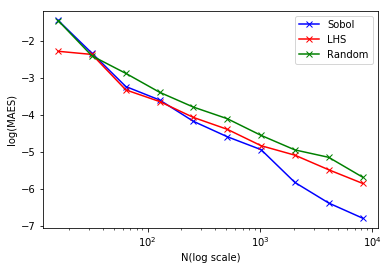

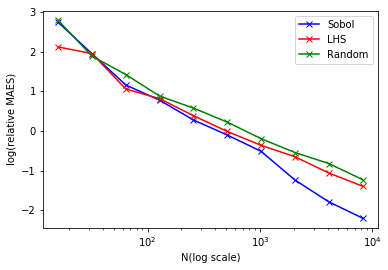

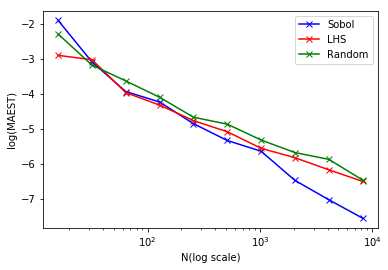

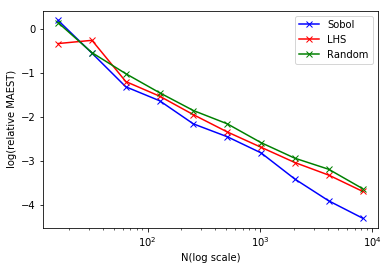

Wall time: 1.16 s


In [47]:
%%time
calp.draw_maes_plot_nomorris(N, maes_1_2, maes_2_2, maes_3_2
                   , maest_1_2, maest_2_2, maest_3_2
                   , rel_maes_1_2, rel_maes_2_2, rel_maes_3_2
                   , rel_maest_1_2, rel_maest_2_2, rel_maest_3_2)
#draw convergence log(MAES) and log(MAEST)

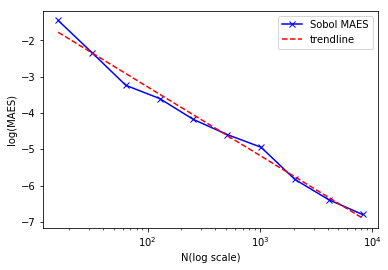

Wall time: 274 ms


In [48]:
%%time
#double check trend line
crf.check_trend_line(z_1_2, N, maes_1_2, name_z_1[0])

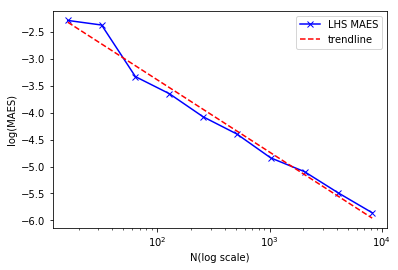

Wall time: 330 ms


In [49]:
%%time
crf.check_trend_line(z_2_2, N, maes_2_2, name_z_1[1])

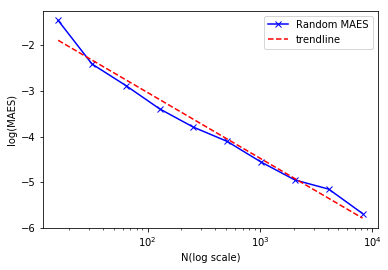

Wall time: 257 ms


In [50]:
%%time
crf.check_trend_line(z_3_2, N, maes_3_2, name_z_1[2])

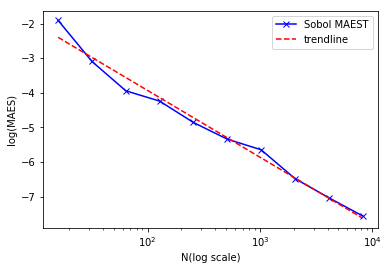

Wall time: 267 ms


In [51]:
%%time
crf.check_trend_line(z_t_1_2, N, maest_1_2, name_z_1[3])

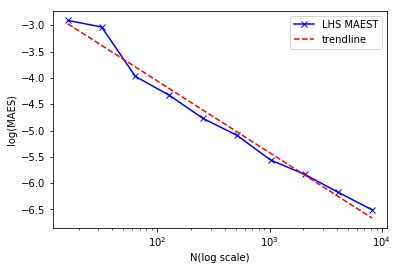

Wall time: 268 ms


In [52]:
%%time
crf.check_trend_line(z_t_2_2, N, maest_2_2, name_z_1[4])

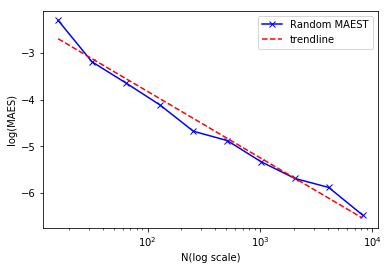

Wall time: 325 ms


In [53]:
%%time
crf.check_trend_line(z_t_3_2, N, maest_3_2, name_z_1[5])

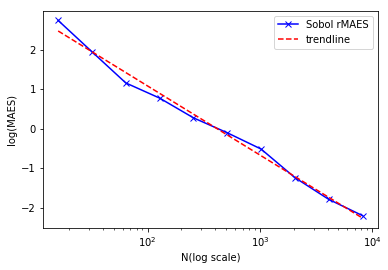

Wall time: 251 ms


In [54]:
%%time
crf.check_trend_line(z_r_1_2, N, rel_maes_1_2, name_z_1[6])

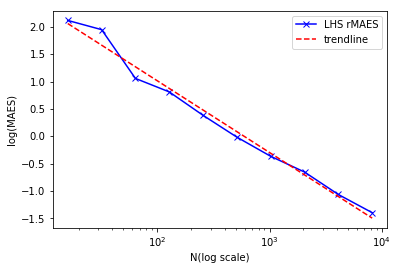

Wall time: 283 ms


In [55]:
%%time
crf.check_trend_line(z_r_2_2, N, rel_maes_2_2, name_z_1[7])

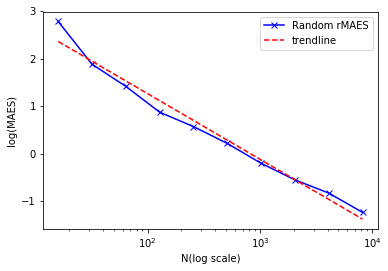

Wall time: 282 ms


In [56]:
%%time
crf.check_trend_line(z_r_3_2, N, rel_maes_3_2, name_z_1[8])

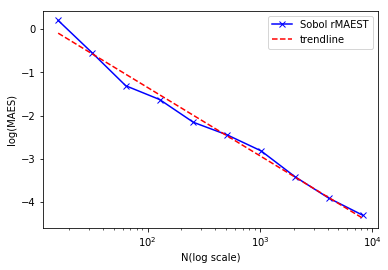

Wall time: 348 ms


In [57]:
%%time
crf.check_trend_line(z_r_t_1_2, N, rel_maest_1_2, name_z_1[9])

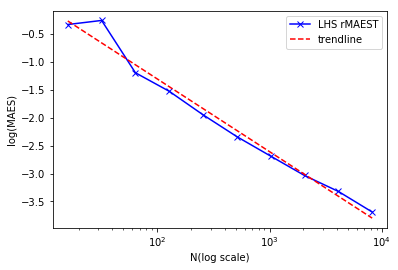

Wall time: 271 ms


In [58]:
%%time
crf.check_trend_line(z_r_t_2_2, N, rel_maest_2_2, name_z_1[10])

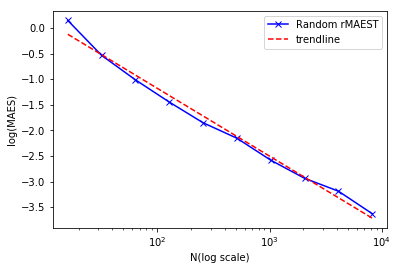

Wall time: 268 ms


In [59]:
%%time
crf.check_trend_line(z_r_t_3_2, N, rel_maest_3_2, name_z_1[11])

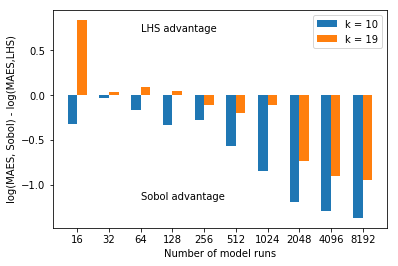

In [60]:
#Sobol and LHS
d_1 = maes_1 - maes_2
d_2 = maes_1_2 - maes_2_2
cam.draw_comparison_abs_maes(N, d_1, d_2, 'Sobol', 'LHS')

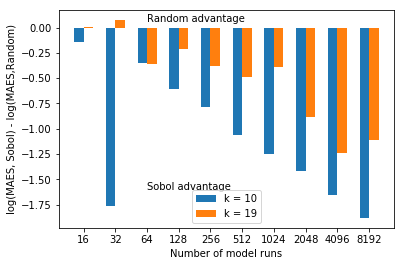

In [61]:
#Sobol and Random
d_3 = maes_1 - maes_3
d_4 = maes_1_2 - maes_3_2
cam.draw_comparison_abs_maes(N, d_3, d_4, 'Sobol', 'Random')

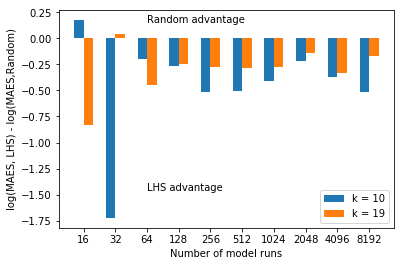

In [62]:
#LHS and Random
d_5 = maes_2 - maes_3
d_6 = maes_2_2 - maes_3_2
cam.draw_comparison_abs_maes(N, d_5, d_6, 'LHS', 'Random')

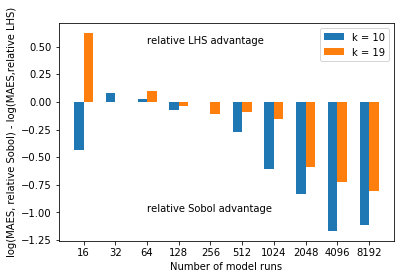

In [63]:
#relative Sobol and relative LHS
d_7 = rel_maes_1 - rel_maes_2
d_8 = rel_maes_1_2 - rel_maes_2_2
cam.draw_comparison_abs_maes(N, d_7, d_8, 'relative Sobol', 'relative LHS')

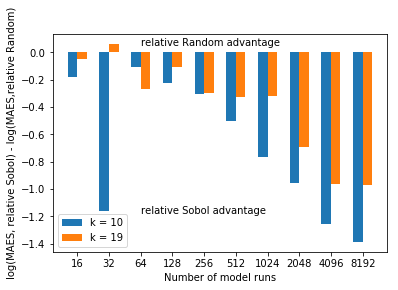

In [64]:
#relative Sobol and relative Random
d_9 = rel_maes_1 - rel_maes_3
d_10 = rel_maes_1_2 - rel_maes_3_2
cam.draw_comparison_abs_maes(N, d_9, d_10, 'relative Sobol', 'relative Random')

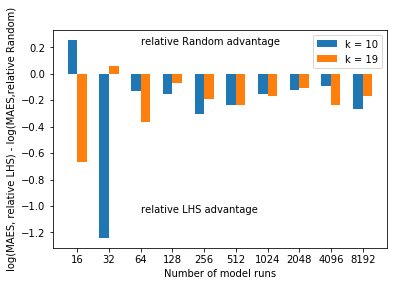

In [65]:
#LHS and Random
d_11 = rel_maes_2 - rel_maes_3
d_12 = rel_maes_2_2 - rel_maes_3_2
cam.draw_comparison_abs_maes(N, d_11, d_12, 'relative LHS', 'relative Random')